# Create a scene to observe
Because we're observing disks, we patch together a bunch of dots.

In [1]:
import json

import pandeia_coronagraphy.scene as pc_scene
from pandeia_funcs import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# primary star
target_ls = 1.56
target_pc = 17.4
target_mv = 5.52
target_sp = 'f8v'

# reference star, spectral type shouldn't matter too much
ref_mv = 4.9
ref_sp = 'g0v'

## Get a star

In [3]:
# create target and ref stars
targ = [scene_star(target_sp, target_mv)]
ref = [scene_star(ref_sp, ref_mv)]

## Now add some disk components
Below are a few different ways one might do this.

In [4]:
# individual belts, one element per component
r = np.array([20,70]) / target_pc
dr = np.array([5,10]) / target_pc
tot_flux = [20, 0.2]    # mJy
temp = [100., 42.]      # K
norm_wave = [20., 20.]  # um

# common geometry
inc = 70  # deg
pa = 30

for r1, dr1, fl1, t1, w1 in zip(r, dr, tot_flux, temp, norm_wave):
    targ = add_ring(targ, r1, dr1, fl1, t1, w1, inc, pa)
    
pc_scene.rotate_scene(targ, -pa)

adding 25pt disk with r:1.14943", dr:0.287356", tot flux:20mJy @ 20.0um, temp:100.0K, incl:70deg
adding 43pt disk with r:4.02299", dr:0.574713", tot flux:0.2mJy @ 20.0um, temp:42.0K, incl:70deg


In [10]:
# create an extended disk
r = np.linspace(20, 100, 9) / target_pc
dr = np.diff(r)
r_cen = r[:-1] + np.diff(r)/2
temp = 278.3 * target_ls**0.25 / np.sqrt(r_cen)
flux = 1 / np.sqrt(r_cen)

targ = add_radial_profile(targ, r_cen, dr, flux, temp, norm_wave[0], inc, pa)

pc_scene.rotate_scene(targ, -pa)

adding 15pt disk with r:1.43678", dr:0.574713", tot flux:0.834266144585mJy @ 20.0um, temp:259.477064306K, incl:70deg
adding 21pt disk with r:2.01149", dr:0.574713", tot flux:0.705083581672mJy @ 20.0um, temp:219.298144903K, incl:70deg
adding 28pt disk with r:2.58621", dr:0.574713", tot flux:0.621825270206mJy @ 20.0um, temp:193.402784797K, incl:70deg
adding 34pt disk with r:3.16092", dr:0.574713", tot flux:0.562462119937mJy @ 20.0um, temp:174.939401068K, incl:70deg
adding 40pt disk with r:3.73563", dr:0.574713", tot flux:0.517389899102mJy @ 20.0um, temp:160.920844016K, incl:70deg
adding 47pt disk with r:4.31034", dr:0.574713", tot flux:0.481663783152mJy @ 20.0um, temp:149.809152926K, incl:70deg
adding 53pt disk with r:4.88506", dr:0.574713", tot flux:0.452444341718mJy @ 20.0um, temp:140.721195883K, incl:70deg
adding 59pt disk with r:5.45977", dr:0.574713", tot flux:0.427969502111mJy @ 20.0um, temp:133.10892542K, incl:70deg


In [12]:
# if we were importing an image
aspp = 0.5
img = np.random.uniform(size=(20,20))
y, x = np.indices(img.shape) * aspp
x -= (img.shape[1]-1) / 2. * aspp
y -= (img.shape[0]-1) / 2. * aspp
r = np.sqrt( x**2 + y**2 )
dx = np.diff(x)[0,0]
temp = lambda x: 278.3 * target_ls**0.25 / np.sqrt(x)
ni = 2
targ = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        s = get_dot(id=ni, x=x[j,i], y=y[j,i], size=dx, norm_wave=20, norm_flux=img[j,i], temp=temp(r[j,i]))
        targ.append(s)
        ni += 1

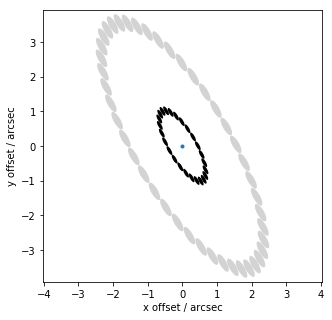

In [5]:
# plot it
plot_disk_scene(targ)

In [6]:
with open('targ.json','w') as f:
    json.dump(targ, f)
    
with open('ref.json','w') as f:
    json.dump(ref, f)    